## **CAR ACCEPTABILITY PREDICTION : CLASSIFICATION ANALYSIS**



---



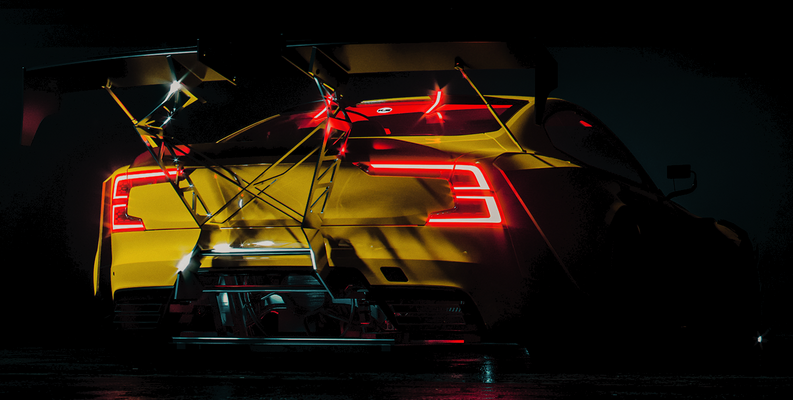

##**IMPORTING LIBRARIES**

---



In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pickle
import plotly.express as px
from sklearn import tree

## **IMPORTING DATASET**

---



In [58]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/car.csv')
df

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [59]:
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [60]:
df.tail()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [61]:
print(f"The dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The dataframe has 1728 rows and 7 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying_Price       1728 non-null   object
 1   Maintenance_Price  1728 non-null   object
 2   No_of_Doors        1728 non-null   object
 3   Person_Capacity    1728 non-null   object
 4   Size_of_Luggage    1728 non-null   object
 5   Safety             1728 non-null   object
 6   Car_Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.describe()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


## **DATA PREPROCESSING**

---



In [ ]:
#To check missing values
df.isna().sum()

Buying_Price         0
Maintenance_Price    0
No_of_Doors          0
Person_Capacity      0
Size_of_Luggage      0
Safety               0
Car_Acceptability    0
dtype: int64

In [ ]:
#check duplicate values in dataset
df.duplicated().sum()

0

In [ ]:
df.dtypes

Buying_Price         object
Maintenance_Price    object
No_of_Doors          object
Person_Capacity      object
Size_of_Luggage      object
Safety               object
Car_Acceptability    object
dtype: object

In [ ]:
df.columns

Index(['Buying_Price', 'Maintenance_Price', 'No_of_Doors', 'Person_Capacity',
       'Size_of_Luggage', 'Safety', 'Car_Acceptability'],
      dtype='object')

In [ ]:
# To determine unique values
for i in df.columns:
  print(i,':\n',df[i].unique())

Buying_Price :
 ['vhigh' 'high' 'med' 'low']
Maintenance_Price :
 ['vhigh' 'high' 'med' 'low']
No_of_Doors :
 ['2' '3' '4' '5more']
Person_Capacity :
 ['2' '4' 'more']
Size_of_Luggage :
 ['small' 'med' 'big']
Safety :
 ['low' 'med' 'high']
Car_Acceptability :
 ['unacc' 'acc' 'vgood' 'good']


In [ ]:
for i in df:
  if df[i].dtype=='object':
    print(i,'|',df[i].nunique())

Buying_Price | 4
Maintenance_Price | 4
No_of_Doors | 4
Person_Capacity | 3
Size_of_Luggage | 3
Safety | 3
Car_Acceptability | 4


In [ ]:
for i in df:
  if df[i].dtype=='object':
    print(df[i].value_counts())
    print('-----------------------')

Buying_Price
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
-----------------------
Maintenance_Price
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
-----------------------
No_of_Doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
-----------------------
Person_Capacity
2       576
4       576
more    576
Name: count, dtype: int64
-----------------------
Size_of_Luggage
small    576
med      576
big      576
Name: count, dtype: int64
-----------------------
Safety
low     576
med     576
high    576
Name: count, dtype: int64
-----------------------
Car_Acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64
-----------------------


In [ ]:
df['No_of_Doors'].replace('5more',5,inplace=True)

In [ ]:
df['Person_Capacity'].replace('more',5,inplace=True)

In [ ]:
col=['No_of_Doors','Person_Capacity']
for i in col:
  df[i]=df[i].astype(int)

## **DATA VISUALIZATION**


---








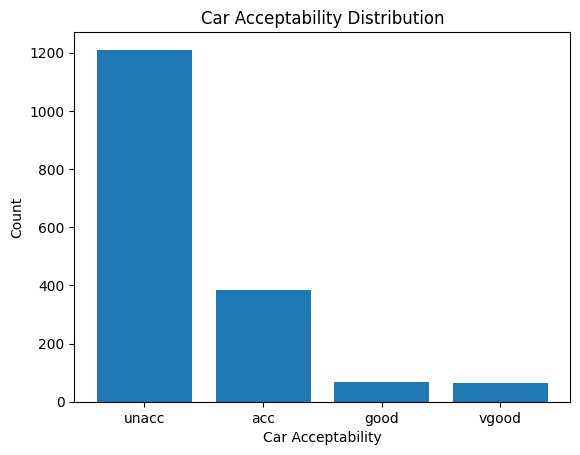

In [ ]:
car_counts = df['Car_Acceptability'].value_counts()
plt.bar(car_counts.index, car_counts.values)
plt.title('Car Acceptability Distribution')
plt.xlabel('Car Acceptability')
plt.ylabel('Count')

plt.show()

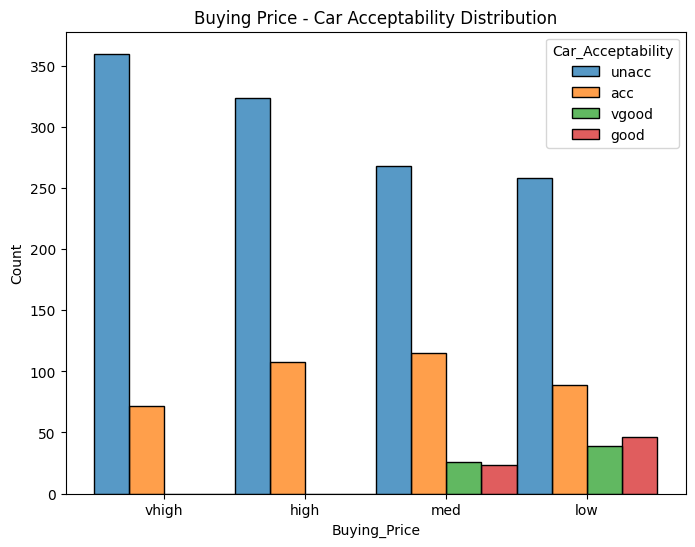

In [84]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'Buying_Price', hue = 'Car_Acceptability', data = df, multiple='dodge')
plt.title('Buying Price - Car Acceptability Distribution')
plt.show()

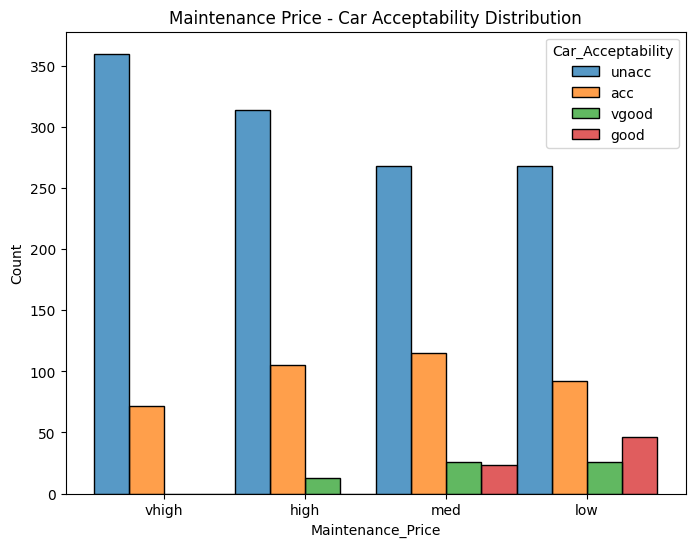

In [85]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'Maintenance_Price', hue = 'Car_Acceptability', data = df, multiple='dodge')
plt.title('Maintenance Price - Car Acceptability Distribution')
plt.show()

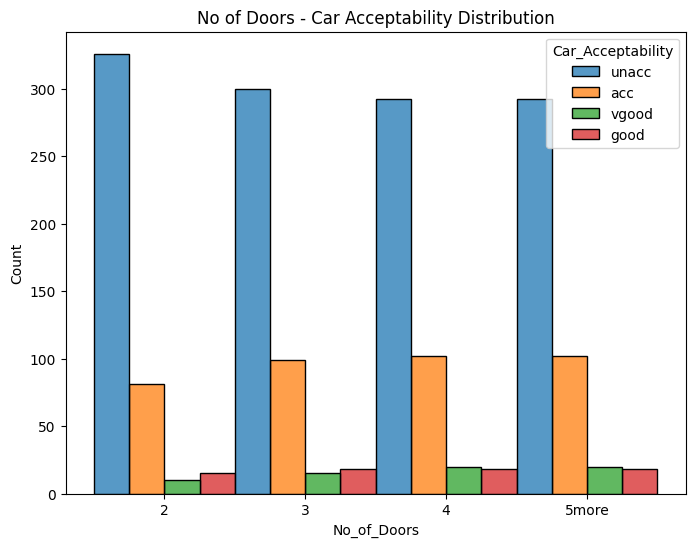

In [86]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'No_of_Doors', hue = 'Car_Acceptability', data = df, multiple='dodge')
plt.title('No of Doors - Car Acceptability Distribution')
plt.show()

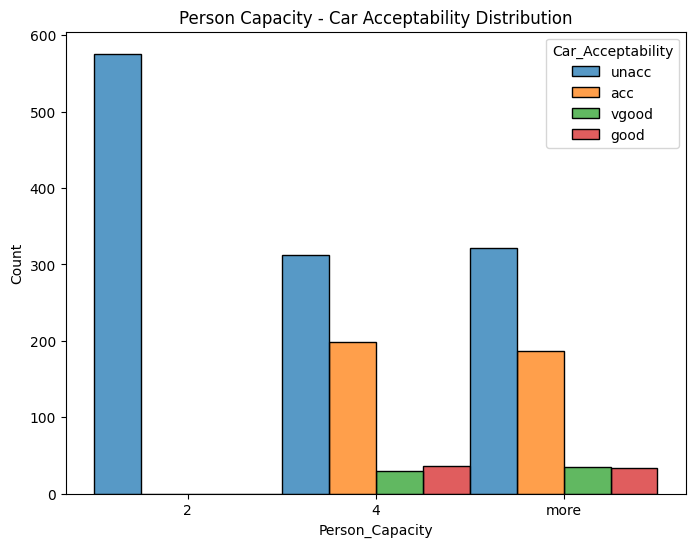

In [87]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'Person_Capacity', hue = 'Car_Acceptability', data = df, multiple='dodge')
plt.title('Person Capacity - Car Acceptability Distribution')
plt.show()

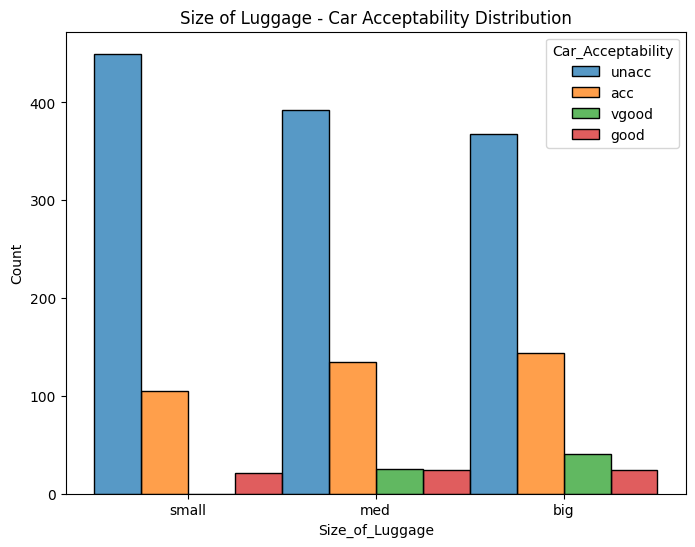

In [88]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'Size_of_Luggage', hue = 'Car_Acceptability', data = df, multiple='dodge')
plt.title('Size of Luggage - Car Acceptability Distribution')
plt.show()

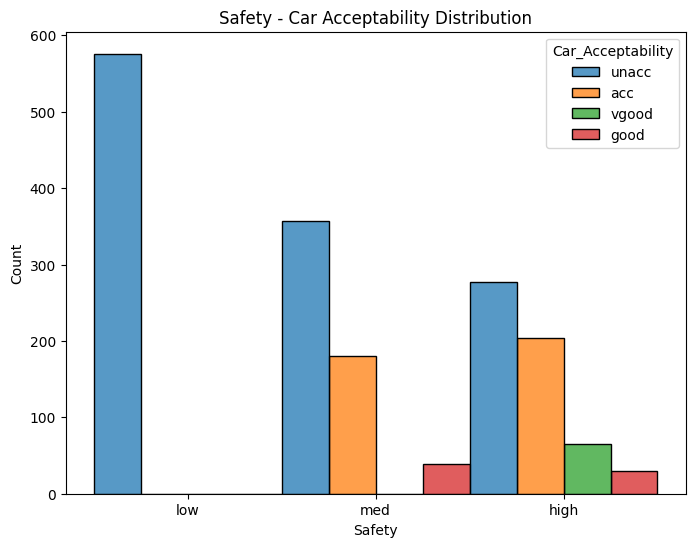

In [89]:
plt.figure(figsize=(8,6))
sns.histplot(x = 'Safety', hue = 'Car_Acceptability', data = df, multiple='dodge')
plt.title('Safety - Car Acceptability Distribution')
plt.show()

## **LABEL ENCODING**

---



In [ ]:
columns=['Buying_Price','Maintenance_Price','Size_of_Luggage', 'Safety', 'Car_Acceptability']
le_dict={}
for col in columns:
  le_dict[col]=LabelEncoder()
  df[col]=le_dict[col].fit_transform(df[col])
df

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,3,3,2,2,2,1,2
1,3,3,2,2,2,2,2
2,3,3,2,2,2,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,5,5,1,2,1
1724,1,1,5,5,1,0,3
1725,1,1,5,5,0,1,2
1726,1,1,5,5,0,2,1


In [ ]:
df.dtypes

Buying_Price         int64
Maintenance_Price    int64
No_of_Doors          int64
Person_Capacity      int64
Size_of_Luggage      int64
Safety               int64
Car_Acceptability    int64
dtype: object

## **CORRELATION BETWEEN INPUT AND OUTPUT**

---



<Axes: >

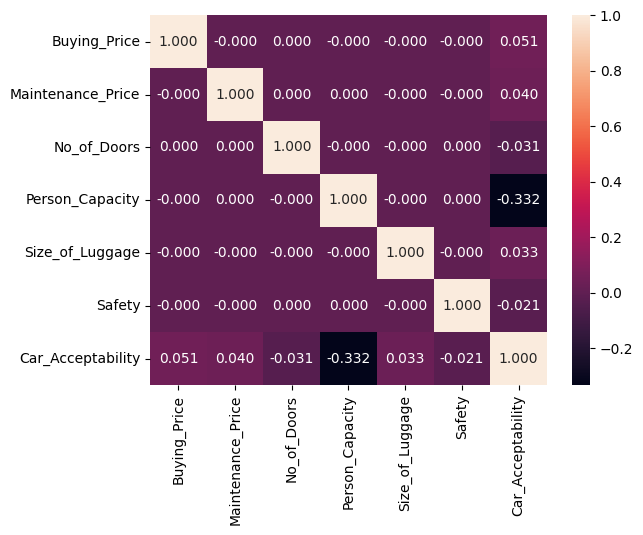

In [ ]:
sns.heatmap(df.corr(),annot=True,fmt='.3f')

## **OUTLIER DETECTION**

---



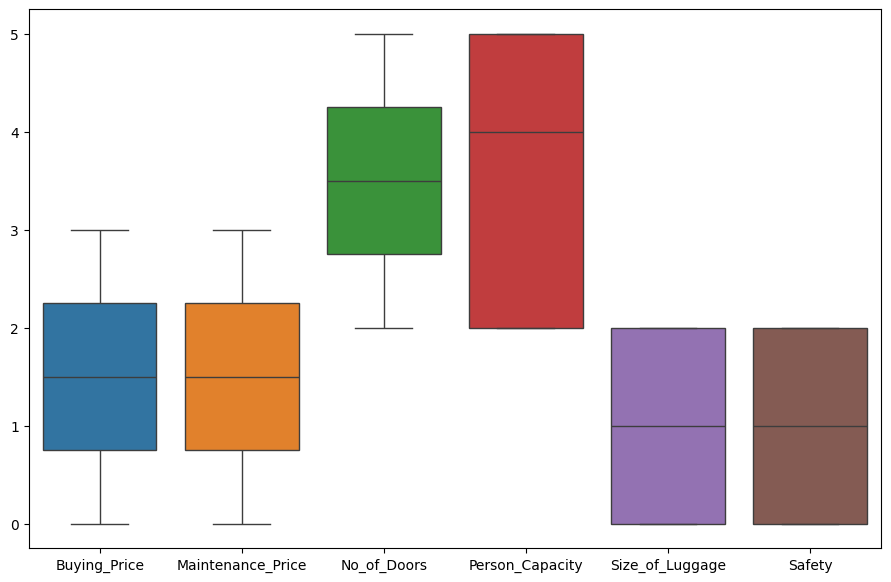

In [ ]:
plt.figure(figsize=(11, 7))
sns.boxplot(data=df[['Buying_Price', 'Maintenance_Price', 'No_of_Doors', 'Person_Capacity',
       'Size_of_Luggage', 'Safety']])
plt.show()

## **SEPERATING FEATURES AND TARGET**

---



In [ ]:
x=df.drop('Car_Acceptability',axis=1)
x

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2
...,...,...,...,...,...,...
1723,1,1,5,5,1,2
1724,1,1,5,5,1,0
1725,1,1,5,5,0,1
1726,1,1,5,5,0,2


In [ ]:
y=df['Car_Acceptability']
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: Car_Acceptability, Length: 1728, dtype: int64

## **HANDLING IMBALANCED DATA**

---



In [ ]:
smote=SMOTE(random_state=34)
x_over,y_over=smote.fit_resample(x,y)

In [ ]:
y_over.value_counts()

Car_Acceptability
2    1210
0    1210
3    1210
1    1210
Name: count, dtype: int64

In [ ]:
x_over.shape

(4840, 6)

In [ ]:
y_over.shape

(4840,)

##**TRAIN TEST SPLIT**

---



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=34)

In [ ]:
x_train.shape,y_train.shape

((3388, 6), (3388,))

In [ ]:
x_test.shape,y_test.shape

((1452, 6), (1452,))

## **MODEL CREATION**

Using algorithms

---





*   K Nearest Neighbors
*   Support Vector Machine
*   Naive Bayes
*   Decision Tree
*   Random Forest
*   GradientBoosting
*   XGBoost
*   AdaBoost















In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
naive=MultinomialNB()
decision=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
gcv=GradientBoostingClassifier()
xgb=XGBClassifier()
ada=AdaBoostClassifier()

# **MODEL EVALUATION**

In [ ]:
models=[knn,svc,naive,decision,rf,gcv,xgb,ada]
for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model)
  print('Accuracy_Score:','\n',accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  print('_'*100,'\n')

KNeighborsClassifier()
Accuracy_Score: 
 89.25619834710744
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       358
           1       0.87      1.00      0.93       352
           2       1.00      0.76      0.87       378
           3       0.90      1.00      0.95       364

    accuracy                           0.89      1452
   macro avg       0.90      0.89      0.89      1452
weighted avg       0.90      0.89      0.89      1452

____________________________________________________________________________________________________ 

SVC()
Accuracy_Score: 
 89.6694214876033
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       358
           1       0.87      0.96      0.91       352
           2       0.99      0.77      0.87       378
           3       0.93      1.00      0.96       364

    accuracy                           0.90      1452
   macro avg       0.90      0.90   

## **HYPERPARAMETER TUNING**

---

Using GridSearchCV and RandomizedSearchCV


In [ ]:
#Hyperparameter tuning of SVC
param_grid={'kernel':['linear','poly','rbf','sigmoid'],
            'C':[0.0001,0.001,0.01,0.1,1,10,100],
            'gamma': ['scale', 'auto',1, 0.1, 0.01, 0.001]
            }
rs=RandomizedSearchCV(SVC(),param_grid,refit=True,cv=5,n_iter=100,random_state=42)
rs.fit(x_over,y_over)


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100],
                                        'gamma': ['scale', 'auto', 1, 0.1, 0.01,
                                                  0.001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42)

In [ ]:
rs.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'C': 10}

In [ ]:
rs.best_score_

0.9706611570247933

In [ ]:
gs1=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[i for i in range(1,30,2)],'weights':['uniform','distance']},cv=5)
gs1.fit(x_over,y_over)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']})

In [ ]:
gs1.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
gs1.best_score_

0.9072314049586776

In [ ]:
nb = MultinomialNB()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'fit_prior': [True, False]}
clf = GridSearchCV(nb, parameters, cv=5,scoring='accuracy')
clf.fit(x_over, y_over)
print(clf.best_params_)


{'alpha': 1, 'fit_prior': True}


In [ ]:
clf.best_score_

0.5185950413223142

In [ ]:
dt=GridSearchCV(DecisionTreeClassifier(),{'criterion':['gini','entropy'],'max_depth':[i for i in range(1,30,2)],'min_samples_split':[i for i in range(2,30,2)]},cv=5,scoring='accuracy')
dt.fit(x_over,y_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                       23, 25, 27, 29],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20, 22, 24, 26, 28]},
             scoring='accuracy')

In [ ]:
dt.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}

In [ ]:
dt.best_score_

0.965289256198347

In [ ]:
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [i for i in range(2,30,2)],
    'min_samples_leaf': [1, 2, 4,6,8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}
rfrs=RandomizedSearchCV(RandomForestClassifier(),param_dist_rf,cv=5,n_iter=100,random_state=42,scoring='accuracy')
rfrs.fit(x_over,y_over)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20, 22, 24, 26,
                                                              28],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='accuracy')

In [ ]:
rfrs.best_params_

{'n_estimators': 400,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 90,
 'bootstrap': False}

In [ ]:
rfrs.best_score_

0.9638429752066117

In [ ]:
param_dist_xgb={'n_estimators':[i for i in range(100,1000,100)],
                'learning_rate':[i for i in np.linspace(0.01,0.3,30)],
                'max_depth':[i for i in range(1,30,2)]}
xgbrs=RandomizedSearchCV(XGBClassifier(),param_dist_xgb,cv=5,n_iter=100,random_state=42,scoring='accuracy')
xgbrs.fit(x_over,y_over)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                          0.18999999999999997,
                                                          0.19999999999999998,
                                                          0.20999999999999996,
                                                          0.21999999999999997,
                                                          0.22999999999999998,
                                                          0.23999999999999996,
                                                          0.24999999999999997,
                                                          0.25999999999999995,
                                                          0.26999999999999996,
                                                          0.27999999999999997,
                                                          0.29, 0.3],
                                        'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   random_state=42, scoring='accuracy')

In [ ]:
xgbrs.best_params_

{'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.10999999999999997}

In [ ]:
xgbrs.best_score_

0.9619834710743801

In [ ]:
param_dist_ada= {
    'n_estimators': [50,500,50],
    'learning_rate': [0.01, 0.1, 1.0,10,100]}
adars=GridSearchCV(AdaBoostClassifier(),param_dist_ada,cv=5,scoring='accuracy')
adars.fit(x_over,y_over)

In [ ]:
adars.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [ ]:
adars.best_score_

0.7764462809917355

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=1,metric='euclidean',weights='uniform')
svc1=SVC(kernel='rbf',C=10,gamma='auto')
naive1=MultinomialNB(alpha=1,fit_prior=True)
decision1=DecisionTreeClassifier(criterion='gini', max_depth=15,min_samples_split=2)
rf1=RandomForestClassifier(n_estimators= 400,min_samples_split=8,min_samples_leaf=2,max_features=None,max_depth=90,bootstrap=False)
gcv1=GradientBoostingClassifier()
xgb1=XGBClassifier(n_estimators= 500, max_depth=15,learning_rate=0.10999999999999997)
ada1=AdaBoostClassifier(learning_rate=0.1,n_estimators=500)

In [ ]:
models2=[knn1,svc1,naive1,decision1,rf1,gcv1,xgb1,ada1]
for model in models2:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(model)
  print('Accuracy_Score:','\n',accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  print('_'*100,'\n')

KNeighborsClassifier(metric='euclidean', n_neighbors=1)
Accuracy_Score: 
 92.69972451790633
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       358
           1       0.94      1.00      0.97       352
           2       0.98      0.79      0.88       378
           3       0.94      1.00      0.97       364

    accuracy                           0.93      1452
   macro avg       0.93      0.93      0.93      1452
weighted avg       0.93      0.93      0.93      1452

____________________________________________________________________________________________________ 

SVC(C=10, gamma='auto')
Accuracy_Score: 
 99.72451790633609
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       358
           1       1.00      1.00      1.00       352
           2       1.00      0.99      1.00       378
           3       1.00      1.00      1.00       364

    accuracy                          

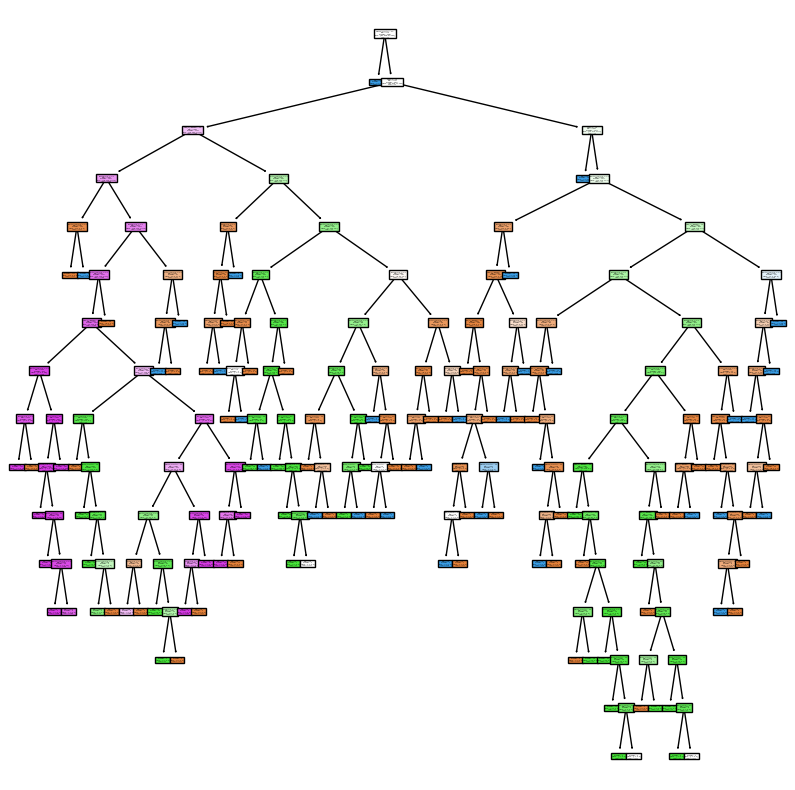

In [ ]:
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the decision tree
tree.plot_tree(decision1, feature_names=x_over.columns, class_names=['unacc', 'acc', 'good', 'vgood'], filled=True, ax=ax)

# Show the plot
plt.show()

In [ ]:
def prediction_value(Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety):
  Buying_Price=le_dict['Buying_Price'].transform([Buying_Price])[0]
  Maintenance_Price=le_dict['Maintenance_Price'].transform([Maintenance_Price])[0]
  Size_of_Luggage=le_dict['Size_of_Luggage'].transform([Size_of_Luggage])[0]
  Safety=le_dict['Safety'].transform([Safety])[0]

  input_data = [[Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety]]
  prediction = svc1.predict(input_data)[0]
  return prediction

In [ ]:
# !pip install --upgrade pandas

In [ ]:
# !pip install --upgrade imbalanced-learn scikit-learn

In [ ]:
needed_files={'label_encoder':le_dict,'model':svc1}
file=open('file.pkl','wb')
pickle.dump(needed_files,file)

In [ ]:
file1=open('file.pkl','rb')
res=pickle.load(file1)
res